In [4]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import nltk
import warnings
import glob
import string

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from collections import Counter

#import sklearn packages for building classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

import seaborn as sns
from bs4 import BeautifulSoup

# New Section

In [5]:
all_files = glob.glob("data/*.csv")
data = pd.concat((pd.read_csv(f, encoding="utf-8-sig") for f in all_files))
data.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z12pgdhovmrktzm3i23es5d5junftft3f,lekanaVEVO1,2014-07-22T15:27:50,i love this so much. AND also I Generate Free ...,1
1,z13yx345uxepetggz04ci5rjcxeohzlrtf4,Pyunghee,2014-07-27T01:57:16,http://www.billboard.com/articles/columns/pop-...,1
2,z12lsjvi3wa5x1vwh04cibeaqnzrevxajw00k,Erica Ross,2014-07-27T02:51:43,Hey guys! Please join me in my fight to help a...,1
3,z13jcjuovxbwfr0ge04cev2ipsjdfdurwck,Aviel Haimov,2014-08-01T12:27:48,http://psnboss.com/?ref=2tGgp3pV6L this is the...,1
4,z13qybua2yfydzxzj04cgfpqdt2syfx53ms0k,John Bello,2014-08-01T21:04:03,Hey everyone. Watch this trailer!!!!!!!! http...,1


In [6]:
def text_clear(text):
    soup = BeautifulSoup(text)
    return soup.get_text().replace("\ufeff", "") # some of the words contains UTF-8 BOM mark, so we remove tags and this mark too

data = data.drop(["COMMENT_ID", "AUTHOR", "DATE"], axis=1)
data['CONTENT'] = data['CONTENT'].apply(text_clear)
data.head()

/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:336: UserWarning: "http://www.twitch.tv/daconnormc﻿" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:336: UserWarning: "https://www.facebook.com/photo.php?fbid=543627485763966&amp;l=0d878a889c﻿" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:336: UserWarning: "http://www.bubblews.com/news/6401116-vps-solutions﻿" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document beh

,CONTENT,CLASS
0,i love this so much. AND also I Generate Free ...,1
1,http://www.billboard.com/articles/columns/pop-...,1
2,Hey guys! Please join me in my fight to help a...,1
3,http://psnboss.com/?ref=2tGgp3pV6L this is the...,1
4,Hey everyone. Watch this trailer!!!!!!!! http...,1


In [7]:
nltk.download("punkt")
nltk.download('stopwords')

warnings.filterwarnings('ignore')

ham_words = ''
spam_words = ''

for val in data[data['CLASS'] == 1].CONTENT:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        spam_words = spam_words + words + ' '

# Creating a corpus of ham messages
for val in data[data['CLASS'] == 0].CONTENT:
    text = text.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        ham_words = ham_words + words + ' '

spam_wordcloud = WordCloud(width=500, height=300).generate(spam_words)
ham_wordcloud = WordCloud(width=500, height=300).generate(ham_words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


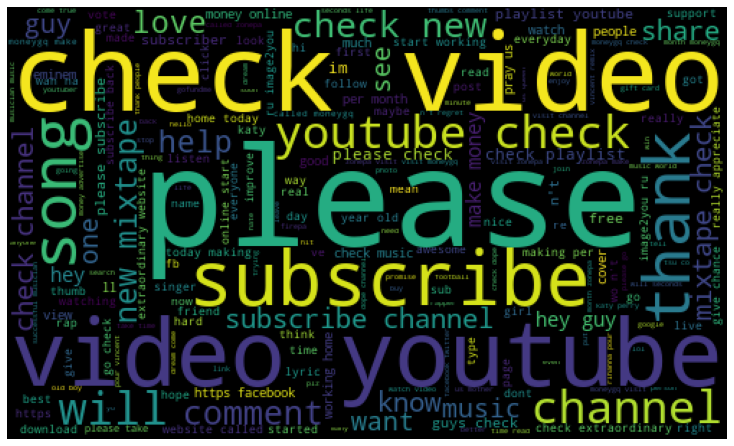

In [8]:
#Spam Word cloud
plt.figure( figsize=(10,8), facecolor='w')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

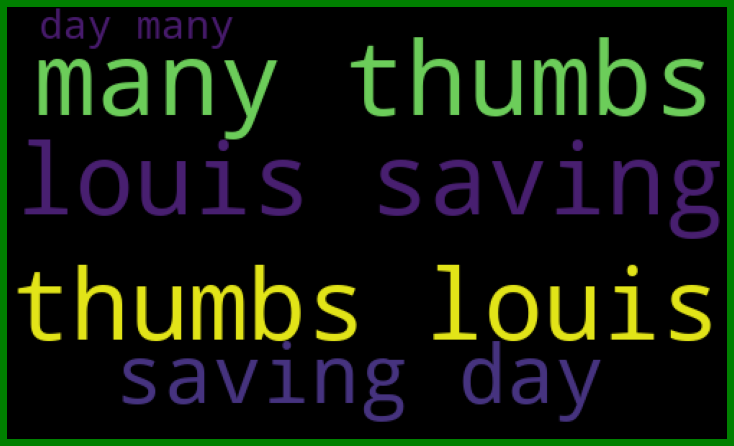

In [9]:
#Creating Ham wordcloud
plt.figure( figsize=(10,8), facecolor='g')
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [10]:
#remove the punctuations and stopwords
def text_process(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]

    return " ".join(text)

data['CONTENT'] = data['CONTENT'].apply(text_process)

CONTENT = pd.DataFrame(data['CONTENT'])
CLASS = pd.DataFrame(data['CLASS'])

total_counts = Counter()
for i in range(len(CONTENT)):
    for word in CONTENT.values[i][0].split(" "):
        total_counts[word] += 1

print("Total words in data set: ", len(total_counts))

Total words in data set:  4992


In [11]:
# Sorting in decreasing order (Word with highest frequency appears first)
vocab = sorted(total_counts, key=total_counts.get, reverse=True)
print(vocab[:60])

['video', 'Check', 'song', 'check', 'like', 'YouTube', 'channel', 'love', 'subscribe', 'music', 'please', 'guys', 'views', 'Im', 'get', 'money', 'Please', 'dont', 'CHECK', 'people', 'make', 'Hey', 'know', 'comment', 'would', 'im', 'videos', '2', 'really', 'see', 'NEW', 'much', 'new', 'good', 'one', 'time', 'u', 'old', 'best', 'us', 'could', '3', 'Katy', 'SUBSCRIBE', 'Subscribe', 'want', 'help', 'everyone', 'songs', 'PLEASE', 'world', 'billion', '1', 'called', 'MIXTAPE', 'go', 'back', 'youtube', 'playlist', 'give']


In [12]:
vocab_size = len(vocab)
word2idx = {}
#print vocab_size
for i, word in enumerate(vocab):
    word2idx[word] = i

# Text to Vector
def text_to_vector(text):
    word_vector = np.zeros(vocab_size)
    for word in text.split(" "):
        if word2idx.get(word) is None:
            continue
        else:
            word_vector[word2idx.get(word)] += 1
    return np.array(word_vector)

# Convert all titles to vectors
word_vectors = np.zeros((len(CONTENT), len(vocab)), dtype=np.int_)
for i, (_, text_) in enumerate(CONTENT.iterrows()):
    word_vectors[i] = text_to_vector(text_[0])

vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(data['CONTENT'])

#features = word_vectors
features = vectors

X_train, X_test, y_train, y_test = train_test_split(features, data['CLASS'], test_size=0.15, random_state=111) #


In [13]:

#initialize multiple classification models
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier(n_neighbors=49)
mnb = MultinomialNB(alpha=0.2)
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=111)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=31, random_state=111)

#create a dictionary of variables and models
clfs = {'Support Vector' : svc,'KNeighbors' : knc, 'Multinomial Naive Bayes': mnb, 'Decision Tree': dtc, 'Logistic Regression': lrc, 'Random Forest': rfc}

#fit the data onto the models
def train(clf, features, targets):
    clf.fit(features, targets)

def predict(clf, features):
    return (clf.predict(features))

pred_scores_word_vectors = []
for k,v in clfs.items():
    train(v, X_train, y_train)
    pred = predict(v, X_test)
    
    pred_scores_word_vectors.append((k, accuracy_score(y_test , pred), precision_score(y_test, pred), recall_score(y_test, pred), f1_score(y_test, pred)))

pd.DataFrame(pred_scores_word_vectors, columns=["Classification model", "Accuracy", "Precision Score", "Recall Score", "F1 Score"])

,Classification model,Accuracy,Precision Score,Recall Score,F1 Score
0,Support Vector,0.894558,0.965278,0.842424,0.899676
1,KNeighbors,0.768707,0.870229,0.690909,0.770270
2,Multinomial Naive Bayes,0.874150,0.944444,0.824242,0.880259
3,Decision Tree,0.897959,0.965517,0.848485,0.903226
4,Logistic Regression,0.843537,0.947368,0.763636,0.845638
5,Random Forest,0.884354,0.978102,0.812121,0.887417


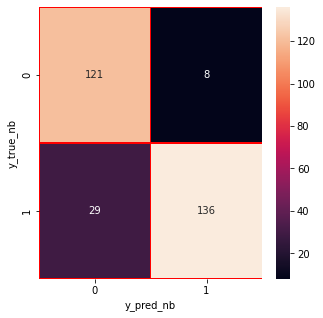

In [14]:

# Naive Bayes
y_pred_nb = mnb.predict(X_test)
y_true_nb = y_test
cm = confusion_matrix(y_true_nb, y_pred_nb)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred_nb")
plt.ylabel("y_true_nb")
plt.show()


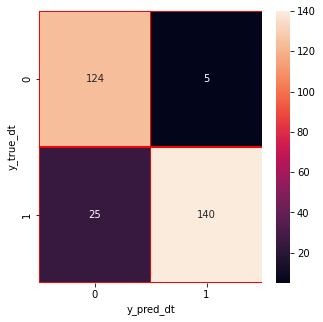

In [15]:
# DecisionTreeClassifier
y_pred_dt = dtc.predict(X_test)
y_true_dt = y_test
cm = confusion_matrix(y_true_dt, y_pred_dt)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred_dt")
plt.ylabel("y_true_dt")
plt.show()

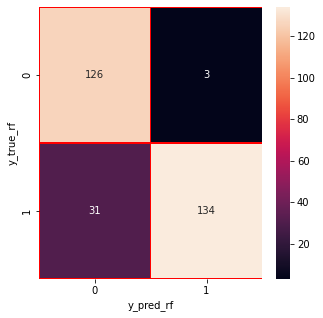

In [16]:
# RandomForestClassifier
y_pred_rf = rfc.predict(X_test)
y_true_rf = y_test
cm = confusion_matrix(y_true_nb, y_pred_rf)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred_rf")
plt.ylabel("y_true_rf")
plt.show()